In [1]:
from scipy import stats
import statsmodels.api as sm 
import pylab as py 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from scipy import stats

import seaborn as sns
from matplotlib import pyplot 


In [2]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, f1_score, matthews_corrcoef
from sklearn import tree

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

import time
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold




In [3]:
# load data
data = pd.read_csv("/Users/macbook/Documents/IS709/df_preprocessed.csv")
data.head()

,lat_rounded,lng_rounded,price,m2,unit_price
0,39.9066,32.8173,420000,130.0,3230.769231
1,39.8836,32.8177,365000,145.0,2517.241379
2,39.8877,32.8182,495000,150.0,3300.000000
3,39.9282,32.8530,175000,92.0,1902.173913
4,39.8902,32.8355,245000,140.0,1750.000000


In [4]:
# drop uni_price
df = data.drop(['unit_price'], axis = 1) 

In [5]:
df.describe()

,lat_rounded,lng_rounded,price,m2
count,31670.000000,31670.000000,3.167000e+04,31670.000000
mean,39.926832,32.790296,3.434500e+05,140.748911
std,0.066048,0.112589,1.897823e+05,43.664224
min,38.936100,31.900500,6.250000e+04,40.000000
25%,39.882700,32.719200,2.100000e+05,115.000000
50%,39.922600,32.827300,2.950000e+05,130.000000
75%,39.974600,32.859500,4.200000e+05,165.000000
max,40.524500,33.539400,1.650000e+06,280.000000


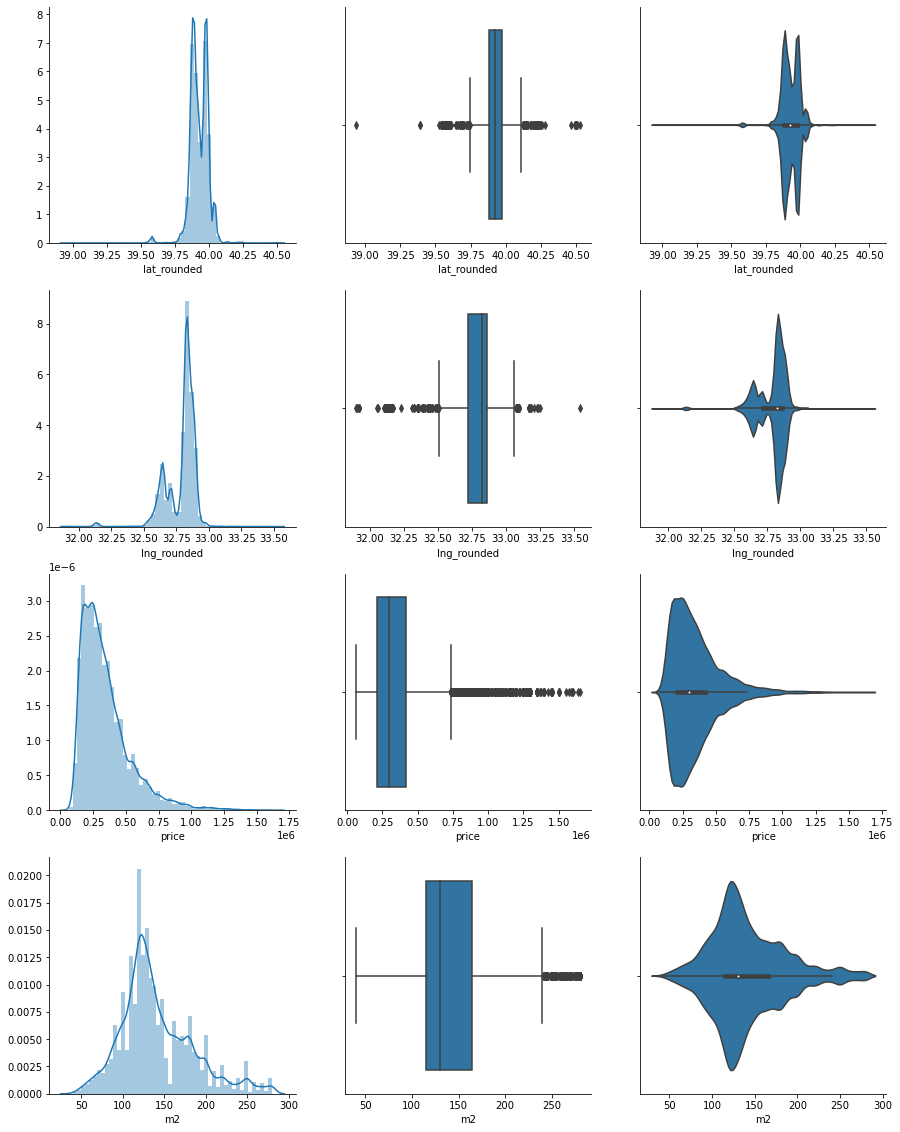

In [6]:
# visualize
f, axes = plt.subplots(4, 3, figsize=(15, 20))
sns.despine(right=True)
for i in range(4):      
    sns.distplot(df.iloc[:,i], ax=axes[i,0], kde=True) #because of the version here I type distplot
    sns.boxplot(x=df.iloc[:,i], ax=axes[i,1])
    sns.violinplot(x=df.iloc[:,i], ax=axes[i,2])

## REGRESSION (4 Models)

We will try **Multiple Lineart, XGBoost, Random Forest**

**Train-validate-test Splits**

In [7]:
x=df.drop("price", axis=1)
y=df["price"]

# %60
x_train_60, x_rest, y_train_60, y_rest = train_test_split(x,y, test_size=0.4, random_state=55)
x_valid_20, x_test_20, y_valid_20, y_test_20 = train_test_split(x_rest,y_rest, test_size=0.5, random_state=38)
print("60-10-10", x_train_60.shape, x_valid_20.shape, x_test_20.shape, y_train_60.shape, y_valid_20.shape, y_test_20.shape )

# %70
x_train_70, x_rest, y_train_70, y_rest = train_test_split(x,y, test_size=0.3, random_state=55)
x_valid_15, x_test_15, y_valid_15, y_test_15 = train_test_split(x_rest,y_rest, test_size=0.5, random_state=38)
print("70-15-15",x_train_70.shape, x_valid_15.shape, x_test_15.shape, y_train_70.shape, y_valid_15.shape, y_test_15.shape )

# %80
x_train_80, x_rest, y_train_80, y_rest = train_test_split(x,y, test_size=0.2, random_state=55)
x_valid_10, x_test_10, y_valid_10, y_test_10 = train_test_split(x_rest,y_rest, test_size=0.5, random_state=38)
print("80-10-10",x_train_80.shape, x_valid_10.shape, x_test_10.shape, y_train_80.shape, y_valid_10.shape, y_test_10.shape )




60-10-10 (19002, 3) (6334, 3) (6334, 3) (19002,) (6334,) (6334,)
70-15-15 (22169, 3) (4750, 3) (4751, 3) (22169,) (4750,) (4751,)
80-10-10 (25336, 3) (3167, 3) (3167, 3) (25336,) (3167,) (3167,)


In [8]:
# scatter plot function
def plotter(y_test, model_pred):
    plt.figure(figsize=(10,10))
    plt.suptitle('Comparison of Predicted and True Price Values', fontsize=18)
    plt.scatter(y_test, model_pred, c='crimson')
    p1 = max(max(model_pred), max(y_test))
    p2 = min(min(model_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predicted', fontsize=15)
    plt.axis('equal')
    return plt.show()

In [9]:
# save each proportions' performance on train-valid-test splits
#records_splits=pd.DataFrame(columns=["split_proportion", "model","metric", "train", "valid", "test"])
#records_splits

,split_proportion,model,metric,train,valid,test


## XGBoost

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [10]:
#DEFINE which split to use in model
x_train, y_train = x_train_80, y_train_80
x_valid, y_valid = x_valid_10, y_valid_10
x_test, y_test = x_test_10, y_test_10

#### HYPERPARAMETER TUNING

In [11]:
start_time=time.time()

#### Define X and Y training data here
X = x_train_80
Y = y_train_80

# grid search
model = xgb.XGBRegressor()

param_grid = {
        'n_estimators' : np.arange(25,500,50),
        'max_depth': [3, 5, 7, 9, 11],
        'min_child_weight': np.arange(1, 6, 2),
        'gamma': np.arange(0.0,0.5,0.1),
        'learning_rate': np.arange(0.0005,0.2,0.0005),
        'subsample': np.arange(0.6,1.0,0.1),
        'colsample_bytree': np.arange(0.6,1.0,0.1)}

kfold = KFold(n_splits=5, shuffle=True, random_state=10)
grid_search = RandomizedSearchCV(model, param_grid, scoring="neg_mean_squared_error", n_iter = 50, cv=kfold)
grid_result = grid_search.fit(X,Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]

print(time.time()-start_time)

Best: -9061929992.865881 using {'subsample': 0.7999999999999999, 'n_estimators': 225, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.0535, 'gamma': 0.2, 'colsample_bytree': 0.8999999999999999}
344.44772028923035


In [12]:
# INITIALIZE MODEL
model_xgb = xgb.XGBRegressor(colsample_bytree=0.8, gamma=0.2, 
                             learning_rate=0.036, max_depth=9, 
                             min_child_weight=1, n_estimators=225,
                             reg_alpha=0.01, reg_lambda=0.01,
                             subsample=0.9,seed=42,
                             random_state =7)


In [13]:
# FIT AND PREDICT
model_xgb.fit(x_train, y_train)
xgb_pred_train = model_xgb.predict(x_train)
xgb_pred_valid = model_xgb.predict(x_valid)
xgb_pred_test = model_xgb.predict(x_test)

In [14]:
# results for training set
print('R2: %.3f' % r2_score(y_train, xgb_pred_train, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_train, xgb_pred_train))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_train, xgb_pred_train))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_train, xgb_pred_train)))

R2: 0.879
Mean Absolute Error: 46629.739
Mean Squared Error: 4323216555.109
Root Mean Squared Error: 65751.172


In [15]:
# results for validation set
print('R2: %.3f' % r2_score(y_valid, xgb_pred_valid, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_valid, xgb_pred_valid))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_valid, xgb_pred_valid))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_valid, xgb_pred_valid)))

R2: 0.758
Mean Absolute Error: 62555.415
Mean Squared Error: 8810806822.442
Root Mean Squared Error: 93865.898


In [16]:
# results for test set
print('R2: %.3f' % r2_score(y_test, xgb_pred_test, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, xgb_pred_test))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, xgb_pred_test))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test)))

R2: 0.760
Mean Absolute Error: 63918.744
Mean Squared Error: 9131873074.557
Root Mean Squared Error: 95560.834


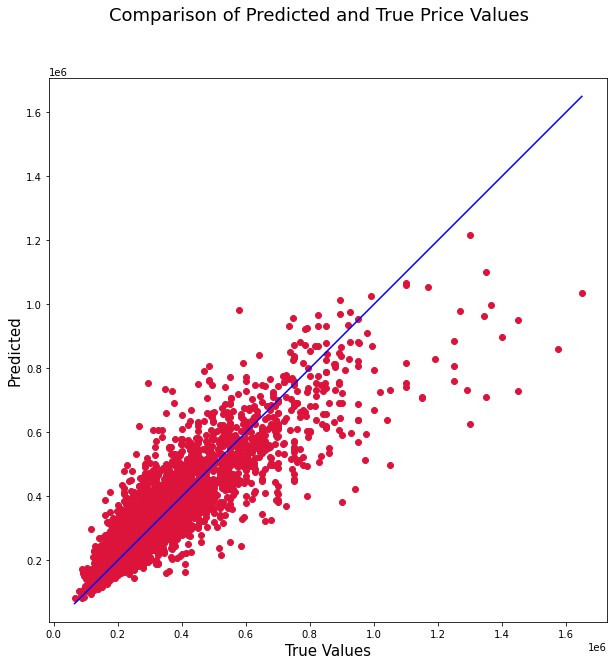

In [17]:
plotter(y_test, xgb_pred_test)

In [18]:
# save 80-20-20 split records 
#records_splits.loc[0]=["80-10-10","XGB","r2", r2_score(y_train, xgb_pred_train, multioutput='variance_weighted'), r2_score(y_valid, xgb_pred_valid, multioutput='variance_weighted'), r2_score(y_test, xgb_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[1]=["80-10-10","XGB","MAE", metrics.mean_absolute_error(y_train, xgb_pred_train), metrics.mean_absolute_error(y_valid, xgb_pred_valid), metrics.mean_absolute_error(y_test, xgb_pred_test)]
#records_splits.loc[2]=["80-10-10","XGB","MSE", metrics.mean_squared_error(y_train, xgb_pred_train), metrics.mean_squared_error(y_valid, xgb_pred_valid), metrics.mean_squared_error(y_test, xgb_pred_test)]
#records_splits.loc[3]=["80-10-10","XGB","RMSE", np.sqrt(metrics.mean_squared_error(y_train, xgb_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, xgb_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test))]


In [19]:
## save 70-15-15 split records 
## set split
#x_train, y_train = x_train_70, y_train_70
#x_valid, y_valid = x_valid_15, y_valid_15
#x_test, y_test = x_test_15, y_test_15
## predict
#model_xgb.fit(x_train, y_train)
#xgb_pred_train = model_xgb.predict(x_train)
#xgb_pred_valid = model_xgb.predict(x_valid)
#xgb_pred_test = model_xgb.predict(x_test)
## write
#records_splits.loc[4]=["70-15-15","XGB","r2", r2_score(y_train, xgb_pred_train, multioutput='variance_weighted'), r2_score(y_valid, xgb_pred_valid, multioutput='variance_weighted'), r2_score(y_test, xgb_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[5]=["70-15-15","XGB","MAE", metrics.mean_absolute_error(y_train, xgb_pred_train), metrics.mean_absolute_error(y_valid, xgb_pred_valid), metrics.mean_absolute_error(y_test, xgb_pred_test)]
#records_splits.loc[6]=["70-15-15","XGB","MSE", metrics.mean_squared_error(y_train, xgb_pred_train), metrics.mean_squared_error(y_valid, xgb_pred_valid), metrics.mean_squared_error(y_test, xgb_pred_test)]
#records_splits.loc[7]=["70-15-15","XGB","RMSE", np.sqrt(metrics.mean_squared_error(y_train, xgb_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, xgb_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test))]


In [20]:
## save 60-20-20 split records 
## set split
#x_train, y_train = x_train_60, y_train_60
#x_valid, y_valid = x_valid_20, y_valid_20
#x_test, y_test = x_test_20, y_test_20
## predict
#model_xgb.fit(x_train, y_train)
#xgb_pred_train = model_xgb.predict(x_train)
#xgb_pred_valid = model_xgb.predict(x_valid)
#xgb_pred_test = model_xgb.predict(x_test)
## save
#records_splits.loc[8]=["60-20-20","XGB","r2", r2_score(y_train, xgb_pred_train, multioutput='variance_weighted'), r2_score(y_valid, xgb_pred_valid, multioutput='variance_weighted'), r2_score(y_test, xgb_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[9]=["60-20-20","XGB","MAE", metrics.mean_absolute_error(y_train, xgb_pred_train), metrics.mean_absolute_error(y_valid, xgb_pred_valid), metrics.mean_absolute_error(y_test, xgb_pred_test)]
#records_splits.loc[10]=["60-20-20","XGB","MSE", metrics.mean_squared_error(y_train, xgb_pred_train), metrics.mean_squared_error(y_valid, xgb_pred_valid), metrics.mean_squared_error(y_test, xgb_pred_test)]
#records_splits.loc[11]=["60-20-20","XGB","RMSE", np.sqrt(metrics.mean_squared_error(y_train, xgb_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, xgb_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, xgb_pred_test))]


In [21]:
#records_splits[records_splits["metric"] == "MSE"].sort_values(by=['test'], ascending=True)

## Random Forest

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [22]:
#DEFINE which split to use in model
x_train, y_train = x_train_80, y_train_80
x_valid, y_valid = x_valid_10, y_valid_10
x_test, y_test = x_test_10, y_test_10

### HYPERPARAMATER TUNING 

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)


{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  7.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [26]:
# INITIALIZE MODEL
model_rf = RandomForestRegressor(n_estimators =555, min_samples_leaf= 1, 
                                 max_features = 'sqrt', max_depth = 20, bootstrap= True, 
                                 random_state = 40)

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}
 
 {'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}
 
 {'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [27]:
# FIT AND PREDICT
model_rf.fit(x_train, y_train)
rf_pred_train = model_rf.predict(x_train)
rf_pred_valid = model_rf.predict(x_valid)
rf_pred_test = model_rf.predict(x_test)

In [28]:
# results for training set
print('R2: %.3f' % r2_score(y_train, rf_pred_train, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_train, rf_pred_train))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_train, rf_pred_train))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)))

R2: 0.954
Mean Absolute Error: 27908.547
Mean Squared Error: 1624953112.806
Root Mean Squared Error: 40310.707


In [29]:
# results for validation set
print('R2: %.3f' % r2_score(y_valid, rf_pred_valid, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_valid, rf_pred_valid))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_valid, rf_pred_valid))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_valid, rf_pred_valid)))

R2: 0.773
Mean Absolute Error: 60285.600
Mean Squared Error: 8264915446.822
Root Mean Squared Error: 90911.580


In [30]:
# results for test set
print('R2: %.3f' % r2_score(y_test, rf_pred_test, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, rf_pred_test))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, rf_pred_test))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test)))

R2: 0.781
Mean Absolute Error: 60470.624
Mean Squared Error: 8357511681.331
Root Mean Squared Error: 91419.427


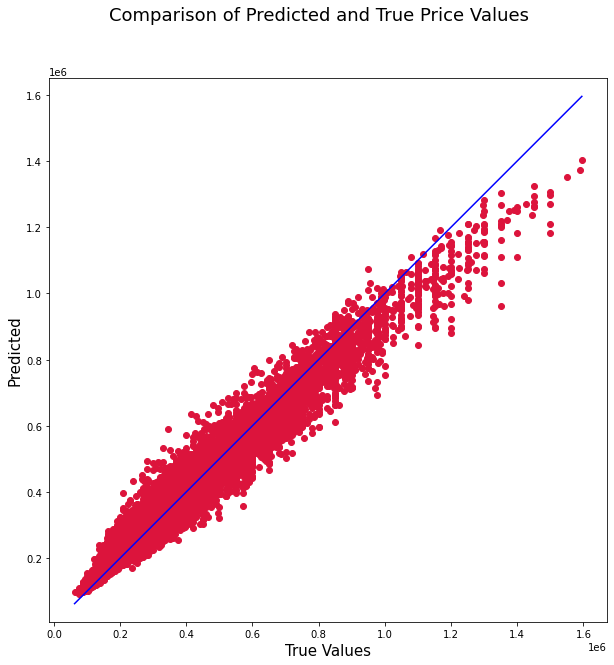

In [31]:
plotter(y_train, rf_pred_train)

In [32]:
# save 80-20-20 split records 
#records_splits.loc[24]=["80-10-10","RF","r2", r2_score(y_train, rf_pred_train, multioutput='variance_weighted'), r2_score(y_valid, rf_pred_valid, multioutput='variance_weighted'), r2_score(y_test, rf_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[25]=["80-10-10","RF","MAE", metrics.mean_absolute_error(y_train, rf_pred_train), metrics.mean_absolute_error(y_valid, rf_pred_valid), metrics.mean_absolute_error(y_test, rf_pred_test)]
#records_splits.loc[26]=["80-10-10","RF","MSE", metrics.mean_squared_error(y_train, rf_pred_train), metrics.mean_squared_error(y_valid, rf_pred_valid), metrics.mean_squared_error(y_test, rf_pred_test)]
#records_splits.loc[27]=["80-10-10","RF","RMSE", np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, rf_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test))]


In [33]:
# save 70-15-15 split records 
## set split
#x_train, y_train = x_train_70, y_train_70
#x_valid, y_valid = x_valid_15, y_valid_15
#x_test, y_test = x_test_15, y_test_15
## predict
#model_rf.fit(x_train, y_train)
#rf_pred_train = model_rf.predict(x_train)
#rf_pred_valid = model_rf.predict(x_valid)
#rf_pred_test = model_rf.predict(x_test)
## save
#records_splits.loc[28]=["70-15-15","RF","r2", r2_score(y_train, rf_pred_train, multioutput='variance_weighted'), r2_score(y_valid, rf_pred_valid, multioutput='variance_weighted'), r2_score(y_test, rf_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[29]=["70-15-15","RF","MAE", metrics.mean_absolute_error(y_train, rf_pred_train), metrics.mean_absolute_error(y_valid, rf_pred_valid), metrics.mean_absolute_error(y_test, rf_pred_test)]
#records_splits.loc[30]=["70-15-15","RF","MSE", metrics.mean_squared_error(y_train, rf_pred_train), metrics.mean_squared_error(y_valid, rf_pred_valid), metrics.mean_squared_error(y_test, rf_pred_test)]
#records_splits.loc[31]=["70-15-15","RF","RMSE", np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, rf_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test))]


In [34]:
# save 60-20-20 split records 

## predict
#model_rf.fit(x_train, y_train)
#rf_pred_train = model_rf.predict(x_train)
#rf_pred_valid = model_rf.predict(x_valid)
#rf_pred_test = model_rf.predict(x_test)
## save
#records_splits.loc[32]=["60-20-20","RF","r2", r2_score(y_train, rf_pred_train, multioutput='variance_weighted'), r2_score(y_valid, rf_pred_valid, multioutput='variance_weighted'), r2_score(y_test, rf_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[33]=["60-20-20","RF","MAE", metrics.mean_absolute_error(y_train, rf_pred_train), metrics.mean_absolute_error(y_valid, rf_pred_valid), metrics.mean_absolute_error(y_test, rf_pred_test)]
#records_splits.loc[34]=["60-20-20","RF","MSE", metrics.mean_squared_error(y_train, rf_pred_train), metrics.mean_squared_error(y_valid, rf_pred_valid), metrics.mean_squared_error(y_test, rf_pred_test)]
#records_splits.loc[35]=["60-20-20","RF","RMSE", np.sqrt(metrics.mean_squared_error(y_train, rf_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, rf_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, rf_pred_test))]


In [35]:
#records_splits[records_splits["metric"] == "MSE"].sort_values(by=['test'], ascending=True)

## Multiple Linear Regression

In [36]:
#DEFINE which split to use in model
x_train, y_train = x_train_80, y_train_80
x_valid, y_valid = x_valid_10, y_valid_10
x_test, y_test = x_test_10, y_test_10

In [37]:
# INITIALIZE MODEL
model_mlr = LinearRegression()

In [38]:
# FIT AND PREDICT
model_mlr.fit(x_train, y_train) 
print('intercept=', model_mlr.intercept_, 'coefficients=', model_mlr.coef_) ##since there are three predictors, .coef_ returns three values in an array
mlr_pred_train = model_mlr.predict(x_train)
mlr_pred_valid = model_mlr.predict(x_valid)
mlr_pred_test = model_mlr.predict(x_test)

intercept= 17788304.279495947 coefficients= [-521300.90905052   90908.58271837    2757.47068957]


In [39]:
# results for validation set
print('R2: %.3f' % r2_score(y_valid, mlr_pred_valid, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_valid, mlr_pred_valid))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_valid, mlr_pred_valid))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_valid, mlr_pred_valid)))

R2: 0.449
Mean Absolute Error: 100680.261
Mean Squared Error: 20031515525.794
Root Mean Squared Error: 141532.737


In [40]:
# results for training set
print('R2: %.3f' % r2_score(y_train, mlr_pred_train, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_train, mlr_pred_train))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_train, mlr_pred_train))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_train, mlr_pred_train)))

R2: 0.436
Mean Absolute Error: 102363.992
Mean Squared Error: 20130507948.959
Root Mean Squared Error: 141882.021


In [41]:
# results for test set
print('R2: %.3f' % r2_score(y_test, mlr_pred_test, multioutput='variance_weighted'))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, mlr_pred_test))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, mlr_pred_test))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, mlr_pred_test)))

R2: 0.451
Mean Absolute Error: 104681.330
Mean Squared Error: 20921081157.644
Root Mean Squared Error: 144641.215


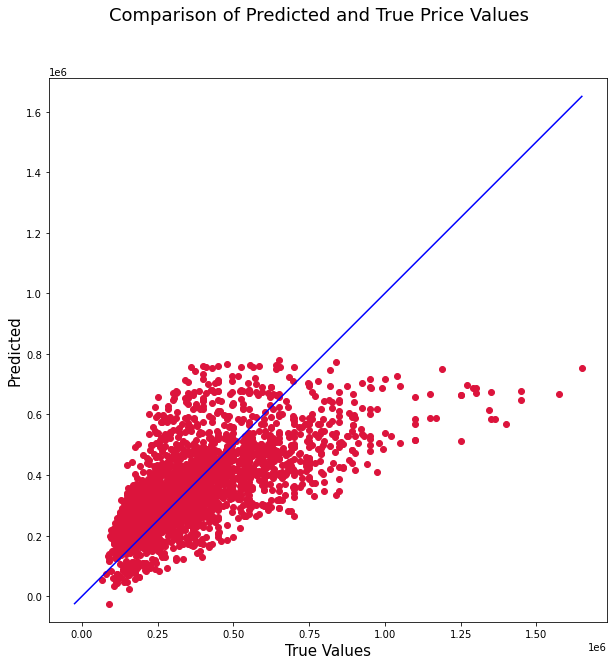

In [42]:
plotter(y_test, mlr_pred_test)

In [43]:
# save 80-20-20 split records 
#ecords_splits.loc[36]=["80-10-10","MLR","r2", r2_score(y_train, mlr_pred_train, multioutput='variance_weighted'), r2_score(y_valid, mlr_pred_valid, multioutput='variance_weighted'), r2_score(y_test, mlr_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[37]=["80-10-10","MLR","MAE", metrics.mean_absolute_error(y_train, mlr_pred_train), metrics.mean_absolute_error(y_valid, mlr_pred_valid), metrics.mean_absolute_error(y_test, mlr_pred_test)]
#records_splits.loc[38]=["80-10-10","MLR","MSE", metrics.mean_squared_error(y_train, mlr_pred_train), metrics.mean_squared_error(y_valid, mlr_pred_valid), metrics.mean_squared_error(y_test, mlr_pred_test)]
#records_splits.loc[39]=["80-10-10","MLR","RMSE", np.sqrt(metrics.mean_squared_error(y_train, mlr_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, mlr_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, mlr_pred_test))]


In [44]:
# save 70-15-15 split records 
## set split
#x_train, y_train = x_train_70, y_train_70
#x_valid, y_valid = x_valid_15, y_valid_15
#x_test, y_test = x_test_15, y_test_15
## predict
#model_rf.fit(x_train, y_train)
#mlr_pred_train = model_mlr.predict(x_train)
#mlr_pred_valid = model_mlr.predict(x_valid)
#mlr_pred_test = model_mlr.predict(x_test)
## save
#records_splits.loc[40]=["70-15-15","MLR","r2", r2_score(y_train, mlr_pred_train, multioutput='variance_weighted'), r2_score(y_valid, mlr_pred_valid, multioutput='variance_weighted'), r2_score(y_test, mlr_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[41]=["70-15-15","MLR","MAE", metrics.mean_absolute_error(y_train, mlr_pred_train), metrics.mean_absolute_error(y_valid, mlr_pred_valid), metrics.mean_absolute_error(y_test, mlr_pred_test)]
#records_splits.loc[42]=["70-15-15","MLR","MSE", metrics.mean_squared_error(y_train, mlr_pred_train), metrics.mean_squared_error(y_valid, mlr_pred_valid), metrics.mean_squared_error(y_test, mlr_pred_test)]
#records_splits.loc[43]=["70-15-15","MLR","RMSE", np.sqrt(metrics.mean_squared_error(y_train, mlr_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, mlr_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, mlr_pred_test))]


In [45]:
# save 60-20-20 split records 
## set split
#x_train, y_train = x_train_60, y_train_60
#x_valid, y_valid = x_valid_20, y_valid_20
#x_test, y_test = x_test_20, y_test_20
## predict
#model_rf.fit(x_train, y_train)
#mlr_pred_train = model_mlr.predict(x_train)
#mlr_pred_valid = model_mlr.predict(x_valid)
#mlr_pred_test = model_mlr.predict(x_test)
## save
#records_splits.loc[44]=["60-20-20","MLR","r2", r2_score(y_train, mlr_pred_train, multioutput='variance_weighted'), r2_score(y_valid, mlr_pred_valid, multioutput='variance_weighted'), r2_score(y_test, mlr_pred_test, multioutput='variance_weighted') ]
#records_splits.loc[45]=["60-20-20","MLR","MAE", metrics.mean_absolute_error(y_train, mlr_pred_train), metrics.mean_absolute_error(y_valid, mlr_pred_valid), metrics.mean_absolute_error(y_test, mlr_pred_test)]
#records_splits.loc[46]=["60-20-20","MLR","MSE", metrics.mean_squared_error(y_train, mlr_pred_train), metrics.mean_squared_error(y_valid, mlr_pred_valid), metrics.mean_squared_error(y_test, mlr_pred_test)]
#records_splits.loc[47]=["60-20-20","MLR","RMSE", np.sqrt(metrics.mean_squared_error(y_train, mlr_pred_train)), np.sqrt(metrics.mean_squared_error(y_valid, mlr_pred_valid)), np.sqrt(metrics.mean_squared_error(y_test, mlr_pred_test))]


## SPLIT COMPARISON

In [46]:
# write csv of records
#records_splits.to_csv(r'/Users/macbook/Documents/IS709/df_split_info.csv', index=False)

# read records csv
records_splits = pd.read_csv("/Users/macbook/Documents/IS709/df_split_info.csv")
data.head()


records_splits[records_splits["metric"] == "RMSE"].sort_values(by=['test'], ascending=True)

,split_proportion,model,metric,train,valid,test
31,70-15-15,RF,RMSE,34139.459360,95709.850043,92364.117263
11,60-20-20,XGB,RMSE,62031.926203,94000.872879,93037.025838
27,80-10-10,RF,RMSE,33811.670405,93620.809050,93311.863755
35,60-20-20,RF,RMSE,34735.813825,95439.764955,93396.914336
7,70-15-15,XGB,RMSE,64193.613373,94731.568419,93597.564781
3,80-10-10,XGB,RMSE,65247.515576,92364.278278,93770.658845
15,80-10-10,LGB,RMSE,26156.369340,98498.981497,97795.124431
23,60-20-20,LGB,RMSE,26156.369340,98498.981497,97795.124431
19,70-15-15,LGB,RMSE,28301.959963,98992.189402,98238.652193
43,70-15-15,MLR,RMSE,142010.062914,145145.565731,139589.998111


In [47]:
records_60 =  records_splits[records_splits["split_proportion"] == "60-20-20"]
records_60[records_60["model"] == "XGB"].describe()


,train,valid,test
count,4.000000e+00,4.000000e+00,4.000000e+00
mean,9.620165e+08,2.209080e+09,2.164011e+09
std,1.923962e+09,4.418056e+09,4.327918e+09
min,8.927487e-01,7.561749e-01,7.608796e-01
25%,3.294670e+04,4.728183e+04,4.710521e+04
50%,5.298028e+04,7.852153e+04,7.792186e+04
75%,9.620365e+08,2.209112e+09,2.164042e+09
max,3.847960e+09,8.836164e+09,8.655888e+09


In [48]:
records_70 =  records_splits[records_splits["split_proportion"] == "70-15-15"]
records_70[records_70["model"] == "XGB"].describe()

,train,valid,test
count,4.000000e+00,4.000000e+00,4.000000e+00
mean,1.030232e+09,2.243557e+09,2.190165e+09
std,2.060392e+09,4.487009e+09,4.380226e+09
min,8.844670e-01,7.577423e-01,7.607273e-01
25%,3.404224e+04,4.745776e+04,4.689163e+04
50%,5.479148e+04,7.900417e+04,7.805974e+04
75%,1.030253e+09,2.243589e+09,2.190196e+09
max,4.120820e+09,8.974070e+09,8.760504e+09


In [49]:
records_80 =  records_splits[records_splits["split_proportion"] == "80-10-10"]
records_80[records_80["model"] == "XGB"].describe()

,train,valid,test
count,4.000000e+00,4.000000e+00,4.000000e+00
mean,1.064337e+09,2.132828e+09,2.198273e+09
std,2.128601e+09,4.265554e+09,4.396442e+09
min,8.807901e-01,7.653202e-01,7.691528e-01
25%,3.467083e+04,4.620097e+04,4.699631e+04
50%,5.573750e+04,7.698266e+04,7.821607e+04
75%,1.064359e+09,2.132859e+09,2.198304e+09
max,4.257238e+09,8.531160e+09,8.792936e+09


## CROSS-VALIDATION

After hyperparemeter tuning models with the the best parameters are cross validated with 10 folds

In [50]:
# Cross-validation with k-folds
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [51]:
score = rmsle_cv(model_mlr)
print("MLR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_rf)
print("RF score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


MLR score: 141878.0461 (2738.0297)

Xgboost score: 94368.0199 (1584.1675)

RF score: 90596.4415 (1820.7644)

